In [32]:
import pandas as pd
import numpy as np

In [33]:
#read file
df=pd.read_excel('../Dry-beans-classification/DryBeanDataset/Dry_Bean_Dataset.xlsx')

In [34]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [35]:
df.shape

(13611, 17)

In [36]:
#separating labels from the data and creating a different file
target_class=df['Class']
target_class

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object

In [37]:
df=df.drop(['Class'],axis=1)
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


Checking for null data

In [38]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

In [39]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

Visualizing to find any outliers or anomalies in the data

In [40]:
import matplotlib.pyplot as plt

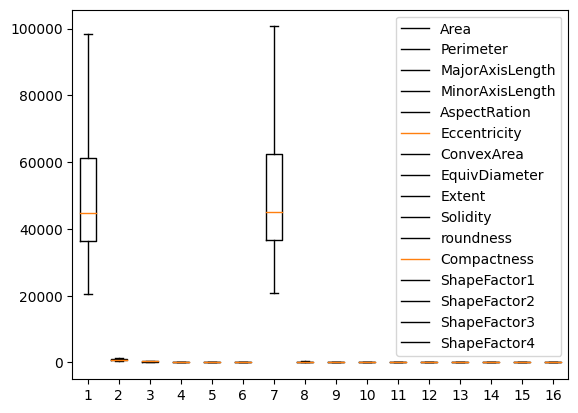

In [41]:
#box plot
plt.boxplot(df,showfliers=False)
plt.legend(df.columns)
plt.show()

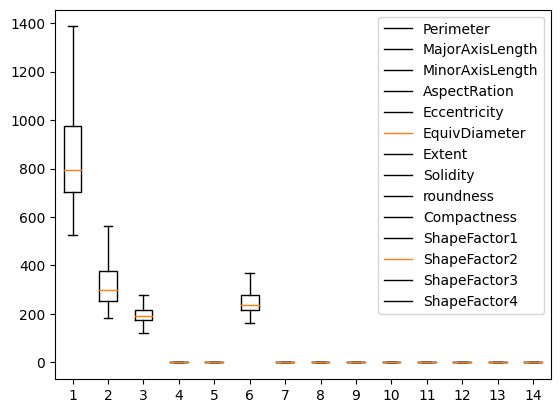

In [42]:
#creating box plot for feature beside area and convex area because of scale
temp_df=df.drop(['Area','ConvexArea'],axis=1)
plt.boxplot(temp_df,showfliers=False)
plt.legend(temp_df.columns)
plt.show()

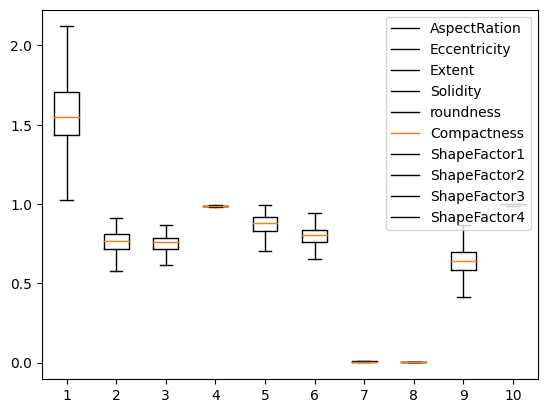

In [43]:
temp_df=temp_df.drop(['Perimeter','MajorAxisLength','MinorAxisLength','EquivDiameter'],axis=1)
plt.boxplot(temp_df,showfliers=False)
plt.legend(temp_df.columns)
plt.show()

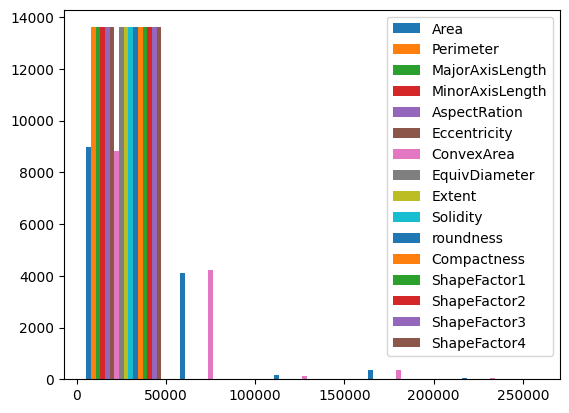

In [44]:
#histogram
plt.hist(df,bins=5,label=df.columns)
plt.legend(df.columns)
plt.show()

Area,ConvexArea has the highest variance.
Perimeter,MajorAxisLength,MinorAxisLength,EquivDiameter the next highest variance.


In [45]:
#Expoting tarining and testing dataset
df.to_excel('../Dry-beans-classification/DryBeanDataset/training_dataset.xlsx',index=False)
target_class.to_excel('../Dry-beans-classification/DryBeanDataset/test_dataset.xlsx',index=False)

Partitioning the dataset into a separate training and test set


In [46]:
from sklearn.model_selection import train_test_split
train_dataset=pd.read_excel('../Dry-beans-classification/DryBeanDataset/training_dataset.xlsx')
test_dataset=pd.read_excel('../Dry-beans-classification/DryBeanDataset/test_dataset.xlsx')

In [47]:
train_dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [48]:
test_dataset

,Class
0,SEKER
1,SEKER
2,SEKER
3,SEKER
4,SEKER
...,...
13606,DERMASON
13607,DERMASON
13608,DERMASON
13609,DERMASON


In [49]:
X_train,X_test,y_train,y_test=train_test_split(train_dataset,test_dataset,test_size=0.3,random_state=17,shuffle=True,stratify=None)

In [50]:
print(X_train.shape,
y_train.shape,
X_test.shape,
y_test.shape)

(9527, 16) (9527, 1) (4084, 16) (4084, 1)


In [57]:
X_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
6006,49269,895.218,364.399388,172.883372,2.107776,0.880291,49821,250.462051,0.609704,0.988920,0.772549,0.687328,0.007396,0.001018,0.472420,0.995756
5307,86556,1135.769,441.418017,252.026865,1.751472,0.820986,87967,331.973677,0.704097,0.983960,0.843193,0.752062,0.005100,0.001006,0.565597,0.990628
2516,66466,1010.092,356.170584,239.334815,1.488169,0.740581,67508,290.907442,0.780392,0.984565,0.818630,0.816764,0.005359,0.001471,0.667104,0.992763
11187,29544,652.339,250.687307,150.946149,1.660773,0.798399,29923,193.949965,0.665750,0.987334,0.872434,0.773673,0.008485,0.001875,0.598570,0.994088
7910,40610,743.566,273.456203,189.494928,1.443079,0.720974,41048,227.390101,0.726138,0.989330,0.923004,0.831541,0.006734,0.001986,0.691461,0.997833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13265,38726,758.269,276.737004,179.618007,1.540697,0.760740,39285,222.052864,0.715479,0.985771,0.846381,0.802397,0.007146,0.001827,0.643840,0.991963
9264,46973,817.358,316.907897,189.373633,1.673453,0.801819,47364,244.556499,0.778111,0.991745,0.883555,0.771696,0.006747,0.001476,0.595514,0.996565
4491,72106,1055.700,414.834124,224.061433,1.851430,0.841586,73111,302.998697,0.810963,0.986254,0.813018,0.730409,0.005753,0.001010,0.533498,0.987734
3136,79669,1142.445,399.232278,255.972517,1.559669,0.767406,81174,318.492890,0.771837,0.981460,0.767059,0.797763,0.005011,0.001252,0.636426,0.992614


In [52]:
y_train

,Class
6006,HOROZ
5307,CALI
2516,BARBUNYA
11187,DERMASON
7910,SIRA
...,...
13265,DERMASON
9264,SIRA
4491,CALI
3136,BARBUNYA


In [53]:
X_test


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
11327,30057,642.063,239.881421,160.067812,1.498624,0.744808,30433,195.626586,0.805235,0.987645,0.916221,0.815514,0.007981,0.002177,0.665063,0.996679
2787,71441,1051.138,339.368740,270.072271,1.256585,0.605549,72590,301.598253,0.749769,0.984171,0.812527,0.888704,0.004750,0.001828,0.789794,0.992444
12634,35174,694.662,254.417975,176.131279,1.444479,0.721618,35543,211.624497,0.753804,0.989618,0.915977,0.831799,0.007233,0.002136,0.691889,0.999419
3833,208477,1726.086,642.682888,416.131117,1.544424,0.762073,210800,515.209822,0.794271,0.988980,0.879312,0.801655,0.003083,0.000785,0.642650,0.992525
11644,31225,656.028,249.031222,159.952046,1.556912,0.766456,31570,199.391336,0.715825,0.989072,0.911733,0.800668,0.007975,0.002022,0.641069,0.998088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,39282,750.197,269.851201,185.819830,1.452220,0.725140,39865,223.641221,0.709010,0.985376,0.877107,0.828758,0.006870,0.001999,0.686839,0.997441
13397,39695,736.527,276.079887,183.393943,1.505393,0.747485,40036,224.813798,0.791731,0.991483,0.919535,0.814307,0.006955,0.001886,0.663096,0.998220
7085,60395,979.824,406.308294,190.344381,2.134596,0.883478,61054,277.303628,0.798284,0.989206,0.790523,0.682496,0.006728,0.000900,0.465800,0.994295
6114,50563,864.552,335.629367,197.841346,1.696457,0.807795,52100,253.729799,0.682730,0.970499,0.850081,0.755982,0.006638,0.001337,0.571509,0.969540


In [54]:
y_test

,Class
11327,DERMASON
2787,BARBUNYA
12634,DERMASON
3833,BOMBAY
11644,DERMASON
...,...
1035,SEKER
13397,DERMASON
7085,HOROZ
6114,HOROZ


Scaling features using minmax scaling

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [61]:
X_train=scaler.fit_transform(X_train)
print(X_train)

[[0.12318315 0.25364465 0.32561062 ... 0.14565269 0.11309214 0.92359772]
 [0.28239594 0.41833409 0.4643182  ... 0.14182024 0.28282899 0.82505615]
 [0.19661309 0.33229132 0.31079086 ... 0.29182034 0.46774055 0.86609344]
 ...
 [0.22069549 0.36351612 0.41644163 ... 0.14301993 0.22435467 0.76945631]
 [0.25298895 0.42290471 0.38834331 ... 0.22112282 0.41185621 0.86322843]
 [0.10908811 0.21469923 0.28046775 ... 0.19673045 0.17843661 0.81178028]]


In [62]:
X_test=scaler.fit_transform(X_test)
print(X_test)

[[0.04497696 0.0860395  0.10146764 ... 0.54119835 0.4446895  0.93815057]
 [0.2390066  0.39571888 0.28669398 ... 0.42389793 0.66833749 0.85071375]
 [0.0689681  0.12585818 0.12853192 ... 0.52724318 0.49278976 0.99472908]
 ...
 [0.18721722 0.34173251 0.41132261 ... 0.11278978 0.08740555 0.88894367]
 [0.14111971 0.2544689  0.27973198 ... 0.25937673 0.27694475 0.37785604]
 [0.05779068 0.10477356 0.11453214 ... 0.54158555 0.48022295 0.97164565]]
